In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
os.chdir("C:\\Users\\Administrator\\Documents\\DV\\crimefiles")

In [3]:
sll01 = pd.read_csv("07_02_Persons_arrested_by_sex_and_age_group_SLL_2012.csv")
sll02 = pd.read_csv("07_02_Persons_arrested_by_sex_and_age_group_SLL_2013.csv")
sll03 = pd.read_csv("07_02_Persons_arrested_by_sex_and_age_group_SLL_2014.csv")

ipc01 = pd.read_csv("07_01_Persons_arrested_by_sex_and_age_group_IPC_2012.csv")
ipc02 = pd.read_csv("07_01_Persons_arrested_by_sex_and_age_group_IPC_2013.csv")
ipc03 = pd.read_csv("07_01_Persons_arrested_by_sex_and_age_group_IPC_2014.csv")

In [4]:
sll01 = sll01[['STATE/UT','CRIME HEAD','Male Below 18 Years','Female Below 18 Years','Female Total']]
sll02 = sll02[['STATE/UT','CRIME HEAD','Male Below 18 Years','Female Below 18 Years','Female Total']]
sll03 = sll03[['States/UTs','Crime Head','Year','Total Female']]

In [5]:
sll01['Women'] = sll01['Female Total'] - sll01['Female Below 18 Years']
sll02['Women'] = sll02['Female Total'] - sll02['Female Below 18 Years']
sll01['Year'] = 2012
sll02['Year'] = 2013
sll03['Male Below 18 Years'] = np.nan
sll03['Female Below 18 Years'] = np.nan
sll01.drop(['Female Total'],axis=1,inplace=True)
sll02.drop(['Female Total'],axis=1,inplace=True)
sll03['Women'] = sll03['Total Female']
sll03.rename(columns={'States/UTs':'STATE/UT','Crime Head':'CRIME HEAD'},inplace=True)
sll03 = sll03[['STATE/UT','CRIME HEAD','Male Below 18 Years','Female Below 18 Years','Women','Year']]

In [142]:
ipc01['Adult Women'] = ipc01['Female Total'] - ipc01['Female Below 18 Years']
ipc01['Year'] = 2012
ipc02['Adult Women'] = ipc02['Female Total'] - ipc02['Female Below 18 Years']
ipc02['Year'] = 2012
ipc03['Adult Women'] = ipc03['Total Female']
ipc03['Female Below 18 Years'] = np.nan
ipc03['Male Below 18 Years'] = np.nan
ipc03['STATE/UT'] = ipc03['States/UTs']
ipc03['CRIME HEAD'] = ipc03['Crime Head']

In [6]:
ipc01 = ipc01[['STATE/UT','CRIME HEAD','Year','Female Below 18 Years','Male Below 18 Years','Adult Women']]
ipc02 = ipc02[['STATE/UT','CRIME HEAD','Year','Female Below 18 Years','Male Below 18 Years','Adult Women']]
ipc03 = ipc03[['STATE/UT','CRIME HEAD','Year','Female Below 18 Years','Male Below 18 Years','Adult Women']]

KeyError: "['Year' 'Adult Women'] not in index"

In [7]:
ipc01.head()

,STATE/UT,CRIME HEAD,Male Below 18 Years,Female Below 18 Years,Male Between 18-30 Years,Female Between 18-30 Years,Male Between 30-45 Years,Female Between 30-45 Years,Male Between 45-60 Years,Female Between 45-60 Years,Male Above 60 Years,Female Above 60 Years,Male Total,Female Total,Grand Total
0,ANDHRA PRADESH,MURDER (SECTION 302 IPC),65,3,2054,187,1866,216,919,104,85,10,4989,520,5509
1,ARUNACHAL PRADESH,MURDER (SECTION 302 IPC),0,0,53,0,52,2,6,0,0,0,111,2,113
2,ASSAM,MURDER (SECTION 302 IPC),38,0,584,23,738,19,238,2,8,0,1606,44,1650
3,BIHAR,MURDER (SECTION 302 IPC),60,5,2983,108,2462,145,1202,82,147,4,6854,344,7198
4,CHHATTISGARH,MURDER (SECTION 302 IPC),64,5,560,43,487,46,228,13,36,8,1375,115,1490


In [9]:
def uppercase(df):
    val = list()
    for i in df:
        val.append(str(i).upper())
    return(val)

#val1 = list()
#val2 = list()
#val3 = list()
#for i in ipc03['STATE/UT']:
#    val1.append(str(i).upper())
#for i in sll03['STATE/UT']:
#    val2.append(str(i).upper())
#for i in sll02['STATE/UT']:
#    val3.append(str(i).upper())
 

ipc02['STATE/UT'] = uppercase(ipc02['STATE/UT'])
ipc03['STATE/UT'] = uppercase(ipc03['STATE/UT'])
sll03['STATE/UT'] = uppercase(sll03['STATE/UT'])
sll02['STATE/UT'] = uppercase(sll02['STATE/UT'])

KeyError: 'STATE.UT'

In [10]:
ipc = ipc01.append(ipc02)
ipc = ipc.append(ipc03)

sll = sll01.append(sll02)
sll = sll.append(sll03)

In [11]:
print(ipc.shape)
print(sll.shape)

(5712, 33)
(4782, 6)


In [12]:
sll2.head()

NameError: name 'sll2' is not defined

In [13]:
# sll2 = sll[sll['STATE/UT'] != ['TOTAL (UTS)','TOTAL (ALL-INDIA)','TOTAL (STATE)','TOTAL (STATES)','TOTAL (ALL INDIA)']]
sll2 = sll.loc[~sll['STATE/UT'].isin(['TOTAL (UTS)','TOTAL (UTs)','TOTAL (ALL-INDIA)','TOTAL (STATE)','TOTAL (STATES)','TOTAL (ALL INDIA)'])]

In [14]:
sll2['Child'] = sll2['Male Below 18 Years'] + sll2['Female Below 18 Years']

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
sll_child = sll2.groupby(['STATE/UT']).sum()['Child']
state = list(sll_child.index)
child_crim = list(sll_child.values)
child_dict = ({'State':state,'Child Criminals':child_crim})
sll_child = pd.DataFrame(child_dict)

[Text(0,0,'Total (All-India)'),
 Text(0,0,'Total (State)'),
 Text(0,0,'TAMIL NADU'),
 Text(0,0,'Tamil Nadu'),
 Text(0,0,'Gujarat'),
 Text(0,0,'Madhya Pradesh'),
 Text(0,0,'GUJARAT'),
 Text(0,0,'MAHARASHTRA'),
 Text(0,0,'Maharashtra'),
 Text(0,0,'CHHATTISGARH')]

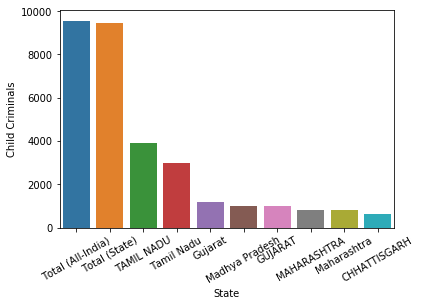

In [16]:
child_sll_plot = sns.barplot(x='State',y='Child Criminals',data=sll_child.sort_values('Child Criminals',ascending=False).head(10))
child_sll_plot = child_sll_plot.set_xticklabels(child_sll_plot.get_xticklabels(),rotation=30)
child_sll_plot

In [17]:
sll_women = sll2.groupby(['STATE/UT']).sum()['Women']
state = list(sll_women.index)
women_crim = list(sll_women.values)
women_dict = ({'State':state,'Women Criminals':women_crim})
sll_women = pd.DataFrame(women_dict)
print(sll_women)

                State  Women Criminals
0       A & N ISLANDS              554
1       A & N Islands              520
2         A&N Islands              464
3      ANDHRA PRADESH             4524
4   ARUNACHAL PRADESH                0
5               ASSAM               42
6      Andhra Pradesh             7765
7   Arunachal Pradesh               76
8               Assam               62
9               BIHAR             2572
10              Bihar             3809
11         CHANDIGARH               50
12       CHHATTISGARH             1690
13         Chandigarh              196
14       Chhattisgarh             3698
15       D & N HAVELI               18
16         D&N Haveli               16
17        DAMAN & DIU               26
18              DELHI              864
19        Daman & Diu               89
20           Delhi UT             1170
21                GOA              275
22            GUJARAT           149516
23                Goa              574
24            Gujarat    

[Text(0,0,'Gujarat'),
 Text(0,0,'Total (All-India)'),
 Text(0,0,'Total (State)'),
 Text(0,0,'Total (All India)'),
 Text(0,0,'Total (States)'),
 Text(0,0,'GUJARAT'),
 Text(0,0,'Tamil Nadu'),
 Text(0,0,'TAMIL NADU'),
 Text(0,0,'Maharashtra'),
 Text(0,0,'MAHARASHTRA')]

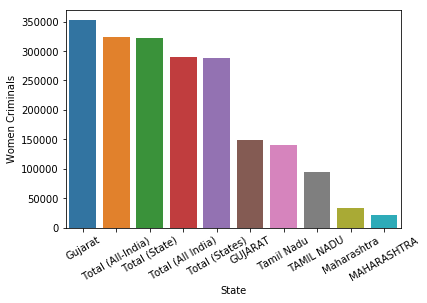

In [18]:
women_sll_plot = sns.barplot(x='State',y='Women Criminals',data=sll_women.sort_values('Women Criminals',ascending=False).head(10))
women_sll_plot = women_sll_plot.set_xticklabels(women_sll_plot.get_xticklabels(),rotation=30)
women_sll_plot

In [19]:
#ipc2['STATE/UT'].unique()

NameError: name 'ipc2' is not defined

In [20]:
ipc2 = ipc.loc[~ipc['STATE/UT'].isin(['TOTAL (UTs)','TOTAL (ALL-INDIA)', 'TOTAL (STATES)','TOTAL (STATE)','TOTAL (UTS)', 'TELANGANA', 'TOTAL (ALL INDIA)'])]

In [21]:
ipc2.columns

Index(['18 and above and below 30 years_Female',
       '18 and above and below 30 years_Male',
       '18 and above and below 30 years_Total',
       '30 and above and below 45 years_Female',
       '30 and above and below 45 years_Male',
       '30 and above and below 45 years_Total',
       '45 and above and below 60 years_Female',
       '45 and above and below 60 years_Male',
       '45 and above and below 60 years_Total', '60 years and above_Female',
       '60 years and above_Male', '60 years and above_Total', 'CRIME HEAD',
       'Crime Head', 'Female Above 60 Years', 'Female Below 18 Years',
       'Female Between 18-30 Years', 'Female Between 30-45 Years',
       'Female Between 45-60 Years', 'Female Total', 'Grand Total',
       'Male Above 60 Years', 'Male Below 18 Years',
       'Male Between 18-30 Years', 'Male Between 30-45 Years',
       'Male Between 45-60 Years', 'Male Total', 'STATE/UT', 'States/UTs',
       'Total Female', 'Total Male', 'Total Persons Arrested by ag

In [22]:
ipc2['Child'] = ipc2['Female Below 18 Years'] + ipc2['Male Below 18 Years']

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
ipc_child = ipc2.groupby(['STATE/UT']).sum()['Child']
state = list(ipc_child.index)
child_crim = list(ipc_child.values)
child_dict = ({'State':state,'Child Criminals':child_crim})
ipc_child = pd.DataFrame(child_dict)

In [24]:
ipc_women = ipc2.groupby(['STATE/UT']).sum()['Adult Women']
state = list(ipc_women.index)
women_crim = list(ipc_women.values)
women_dict = ({'State':state,'Women Criminals':women_crim})
ipc_women = pd.DataFrame(women_dict)

KeyError: 'Adult Women'

[Text(0,0,'MAHARASHTRA'),
 Text(0,0,'MADHYA PRADESH'),
 Text(0,0,'ANDHRA PRADESH'),
 Text(0,0,'RAJASTHAN'),
 Text(0,0,'BIHAR'),
 Text(0,0,'CHHATTISGARH'),
 Text(0,0,'GUJARAT'),
 Text(0,0,'TAMIL NADU'),
 Text(0,0,'UTTAR PRADESH'),
 Text(0,0,'DELHI UT')]

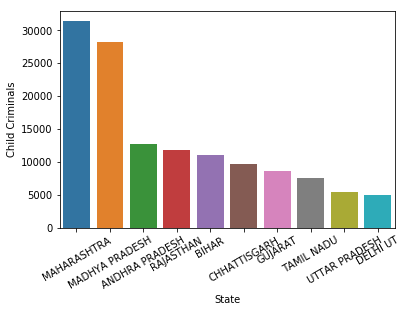

In [237]:
child_ipc_plot = sns.barplot(x='State',y='Child Criminals',data=ipc_child.sort_values('Child Criminals',ascending=False).head(10))
child_ipc_plot = child_ipc_plot.set_xticklabels(child_ipc_plot.get_xticklabels(),rotation=30)
child_ipc_plot

In [26]:
women_ipc_plot = sns.barplot(x='State',y='Women Criminals',data=ipc_women.sort_values('Women Criminals',ascending=False).head(10))
women_ipc_plot = women_ipc_plot.set_xticklabels(women_ipc_plot.get_xticklabels(),rotation=30)
women_ipc_plot

NameError: name 'ipc_women' is not defined